# Assignment 1-c: Deep Learning Hello World! (3-layer MLP+Dropout)

Objective: To be able to improve upon the 3-layer MLP in part 2 by adding dropout for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [8]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

from matplotlib import pyplot as plt
%matplotlib inline

Step 2: Set-up some constants to be utilized in the training/testing of the model <br\>
Note: the number of epochs (NB_EPOCH) is increased to 250

In [9]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits, i.e. 0,1,2,3,4,5,6,7,8,9
OPTIMIZER = SGD() # Stocastic Gradient Descent optimizer
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN dataset is reserved for VALIDATION

DROPOUT = 0.3

np.random.seed(1983)  # for reproducibility

Step 3: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

First 100 train images:


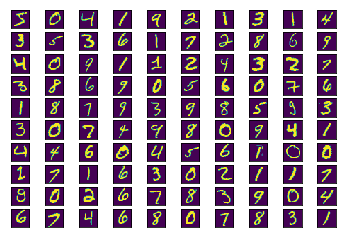

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("First 100 train images:")
for k in range(100):
    plt.subplot(10, 10, k+1)      
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(X_train[k])

Step 4: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [11]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


Step 5: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [12]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Step 6: Create the model with 3 layers: Input:784 ==> Hidden:128 w/ dropout ==> Hidden:128 w/ dropout ==> Output:10 (with Softmax activation)

In [13]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
__________

Step 7: Compile the model with categorical_crossentropy loss function, SGD optimizer, and accuracy metric

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Step 8: Perform the training with 128 batch size, 250 epochs, and 20 % of the train data used for validation

In [15]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 6s - loss: 1.6749 - acc: 0.4718 - val_loss: 0.8680 - val_acc: 0.8195
Epoch 2/250
48000/48000 [==============================] - 3s - loss: 0.9041 - acc: 0.7247 - val_loss: 0.5284 - val_acc: 0.8703
Epoch 3/250
48000/48000 [==============================] - 3s - loss: 0.6895 - acc: 0.7928 - val_loss: 0.4267 - val_acc: 0.8882
Epoch 4/250
48000/48000 [==============================] - 3s - loss: 0.5923 - acc: 0.8208 - val_loss: 0.3753 - val_acc: 0.8961
Epoch 5/250
48000/48000 [==============================] - 3s - loss: 0.5308 - acc: 0.8414 - val_loss: 0.3412 - val_acc: 0.9035
Epoch 6/250
48000/48000 [==============================] - 2s - loss: 0.4902 - acc: 0.8550 - val_loss: 0.3201 - val_acc: 0.9089
Epoch 7/250
48000/48000 [==============================] - 2s - loss: 0.4649 - acc: 0.8622 - val_loss: 0.3026 - val_acc: 0.9119
Epoch 8/250
48000/48000 [=============================

48000/48000 [==============================] - 2s - loss: 0.1635 - acc: 0.9517 - val_loss: 0.1183 - val_acc: 0.9658
Epoch 65/250
48000/48000 [==============================] - 2s - loss: 0.1606 - acc: 0.9521 - val_loss: 0.1166 - val_acc: 0.9664
Epoch 66/250
48000/48000 [==============================] - 2s - loss: 0.1590 - acc: 0.9530 - val_loss: 0.1159 - val_acc: 0.9662
Epoch 67/250
48000/48000 [==============================] - 2s - loss: 0.1553 - acc: 0.9541 - val_loss: 0.1159 - val_acc: 0.9662
Epoch 68/250
48000/48000 [==============================] - 2s - loss: 0.1554 - acc: 0.9531 - val_loss: 0.1145 - val_acc: 0.9667
Epoch 69/250
48000/48000 [==============================] - 2s - loss: 0.1550 - acc: 0.9549 - val_loss: 0.1142 - val_acc: 0.9671
Epoch 70/250
48000/48000 [==============================] - 2s - loss: 0.1551 - acc: 0.9547 - val_loss: 0.1130 - val_acc: 0.9676
Epoch 71/250
48000/48000 [==============================] - 3s - loss: 0.1508 - acc: 0.9562 - val_loss: 0.1121

48000/48000 [==============================] - 3s - loss: 0.1050 - acc: 0.9693 - val_loss: 0.0901 - val_acc: 0.9727
Epoch 128/250
48000/48000 [==============================] - 3s - loss: 0.1022 - acc: 0.9692 - val_loss: 0.0907 - val_acc: 0.9729
Epoch 129/250
48000/48000 [==============================] - 2s - loss: 0.1051 - acc: 0.9688 - val_loss: 0.0899 - val_acc: 0.9735
Epoch 130/250
48000/48000 [==============================] - 2s - loss: 0.1023 - acc: 0.9696 - val_loss: 0.0904 - val_acc: 0.9735
Epoch 131/250
48000/48000 [==============================] - 2s - loss: 0.1030 - acc: 0.9686 - val_loss: 0.0896 - val_acc: 0.9734
Epoch 132/250
48000/48000 [==============================] - 2s - loss: 0.1032 - acc: 0.9681 - val_loss: 0.0892 - val_acc: 0.9736
Epoch 133/250
48000/48000 [==============================] - 2s - loss: 0.1010 - acc: 0.9697 - val_loss: 0.0897 - val_acc: 0.9731
Epoch 134/250
48000/48000 [==============================] - 2s - loss: 0.0990 - acc: 0.9705 - val_loss:

48000/48000 [==============================] - 3s - loss: 0.0782 - acc: 0.9768 - val_loss: 0.0822 - val_acc: 0.9761
Epoch 191/250
48000/48000 [==============================] - 3s - loss: 0.0778 - acc: 0.9765 - val_loss: 0.0819 - val_acc: 0.9757
Epoch 192/250
48000/48000 [==============================] - 3s - loss: 0.0781 - acc: 0.9763 - val_loss: 0.0816 - val_acc: 0.9763
Epoch 193/250
48000/48000 [==============================] - 3s - loss: 0.0777 - acc: 0.9760 - val_loss: 0.0820 - val_acc: 0.9758
Epoch 194/250
48000/48000 [==============================] - 2s - loss: 0.0772 - acc: 0.9770 - val_loss: 0.0814 - val_acc: 0.9762
Epoch 195/250
48000/48000 [==============================] - 2s - loss: 0.0756 - acc: 0.9775 - val_loss: 0.0812 - val_acc: 0.9758
Epoch 196/250
48000/48000 [==============================] - 2s - loss: 0.0765 - acc: 0.9778 - val_loss: 0.0818 - val_acc: 0.9764
Epoch 197/250
48000/48000 [==============================] - 2s - loss: 0.0778 - acc: 0.9762 - val_loss:

Step 9: Evaluate the model on the test dataset (10,000 images)

In [16]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9504/10000 [===========================>..] - ETA: 0s
Test score: 0.0760220484917
Test accuracy: 0.9782


Step 10: Plot the accuracy from history

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


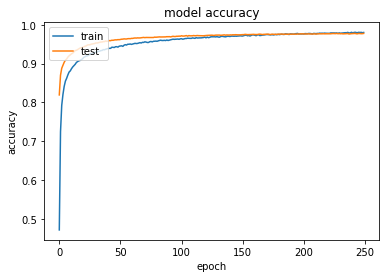

In [17]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Step 11: Plot the loss from history

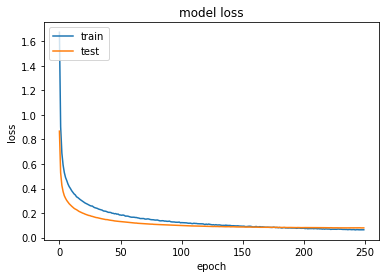

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[Optional] Step 12: Save the model (serialized) to JSON

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  06:43 PM    <DIR>          .
09/17/2017  06:43 PM    <DIR>          ..
09/17/2017  06:07 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  01:16 PM            50,073 DeepLearningHelloWorld.ipynb
09/17/2017  04:32 PM            56,578 DeepLearningHelloWorldPart2.ipynb
09/17/2017  06:43 PM           110,179 DeepLearningHelloWorldPart3.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  04:31 PM           490,640 model.h5
09/17/2017  06:44 PM             2,059 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               5 File(s)        709,529 bytes
               8 Dir(s)  199,080,792,064 bytes free


[Optional] Step 13: Save the model weights

In [20]:
model.save_weights("model.h5")
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  06:43 PM    <DIR>          .
09/17/2017  06:43 PM    <DIR>          ..
09/17/2017  06:07 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  01:16 PM            50,073 DeepLearningHelloWorld.ipynb
09/17/2017  04:32 PM            56,578 DeepLearningHelloWorldPart2.ipynb
09/17/2017  06:43 PM           110,179 DeepLearningHelloWorldPart3.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  06:44 PM           492,240 model.h5
09/17/2017  06:44 PM             2,059 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               5 File(s)        711,129 bytes
               8 Dir(s)  199,080,787,968 bytes free


[Optional] Step 14: Load the saved model

In [21]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

[Optional] Step 15: Compile and evaluate loaded model

In [22]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9376/10000 [===========================>..] - ETA: 0s
Test score: 0.0760220484917
Test accuracy: 0.9782
